In [1]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

geo = "GSE29250"

In [2]:
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Ma2011", silent=True)

In [3]:
data.metadata["platform_id"][0]

'GPL8179'

In [5]:
data.gpls[data.metadata["platform_id"][0]].table

,ID,SYMBOL,ILMN_Gene,Search_Key,SEQUENCE,TargetMatureSeqs,TargetMatureName,miRNA_ID,SPOT_ID,NumTargets,...,Array_Address_Id,Illumicode,Oligo,U3_Seq,Ploidy,Species,Probe_MatchOrder,Chromosome,Probe_Coordinates,Probe_Chr_Orientation
0,ILMN_3167151,ILMN_3167151,hsa-miR-553,hsa-miR-553,AAAACGGTGAGATTTTGTT,AAAACGGTGAGATTTTGTTTT,hsa-miR-553,hsa-miR-553,NaN,1,...,1655,TAGCTGGCCCACGAAATCTGCG,ACTTCGTCAGTAACGGACTAGCTGGCCCACGAAATCTGCGAAAACG...,ACTTCGTCAGTAACGGAC,diploid,human,1,1,100519399,+
1,ILMN_3167958,ILMN_3167958,HS_124,HS_124,AAAAGAACATGGGTTGAG,AAAAGAACATGGGTTGAG,HS_124,NaN,HS_124,1,...,2324,TGAGGTGACGCATCCCTCCATT,ACTTCGTCAGTAACGGACTGAGGTGACGCATCCCTCCATTAAAAGA...,ACTTCGTCAGTAACGGAC,diploid,human,1,0,0,+
2,ILMN_3167403,ILMN_3167403,"hsa-miR-320d,hsa-miR-320b,hsa-miR-320a,hsa-miR...","hsa-miR-320d,hsa-miR-320b,hsa-miR-320a,hsa-miR...",AAAAGCTGGGTTGAGAGG,"AAAAGCTGGGTTGAGAGGA,AAAAGCTGGGTTGAGAGGGCAA,AAA...","hsa-miR-320d,hsa-miR-320b,hsa-miR-320a,hsa-miR...","hsa-miR-320d,hsa-miR-320b,hsa-miR-320a,hsa-miR...",NaN,4,...,913,ACCCGATGGATAGGTCGGTGAA,ACTTCGTCAGTAACGGACACCCGATGGATAGGTCGGTGAAAAAAGC...,ACTTCGTCAGTAACGGAC,diploid,human,"2,2,1,2","13,X,1,1,8,18,18","40,199,983,139,836,000,000,000,000,000,000,000...","-,-,+,-,-,+,+"
3,ILMN_3167819,ILMN_3167819,hsa-miR-522,hsa-miR-522,AAAATGGTTCCCTTTAGAGT,AAAATGGTTCCCTTTAGAGTGT,hsa-miR-522,hsa-miR-522,NaN,1,...,1375,CAGTAATCAGGCGTCTGTTGGC,ACTTCGTCAGTAACGGACCAGTAATCAGGCGTCTGTTGGCAAAATG...,ACTTCGTCAGTAACGGAC,diploid,human,1,19,58946329,+
4,ILMN_3167659,ILMN_3167659,hsa-miR-1537,hsa-miR-1537,AAACCGTCTAGTTACAGTTGT,AAAACCGTCTAGTTACAGTTGT,hsa-miR-1537,hsa-miR-1537,NaN,1,...,2247,CAGTCAGCAGCCGATCTCGGAT,ACTTCGTCAGTAACGGACCAGTCAGCAGCCGATCTCGGATAAACCG...,ACTTCGTCAGTAACGGAC,diploid,human,1,1,234082945,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,ILMN_3168917,ILMN_3168917,solexa-9029-92,solexa-9029-92,AATTACAGATTGTCTCAGAGAA,AATTACAGATTGTCTCAGAGAA,solexa-9029-92,NaN,solexa-9029-92,1,...,2820,CCGTTCGCCTAAGAGATGACCA,ACTTCGTCAGTAACGGACCCGTTCGCCTAAGAGATGACCAAATTAC...,ACTTCGTCAGTAACGGAC,diploid,human,1,0,0,+
1142,ILMN_3167228,ILMN_3167228,solexa-9081-91,solexa-9081-91,CTGAGGGGGGAAAAAA,CTGAGGGGGGAAAAAAA,solexa-9081-91,NaN,solexa-9081-91,1,...,5572,GATCGTGACCCTCTATGCTTAGTG,ACTTCGTCAGTAACGGACGATCGTGACCCTCTATGCTTAGTGCTGA...,ACTTCGTCAGTAACGGAC,diploid,human,1,0,0,+
1143,ILMN_3168918,ILMN_3168918,solexa-9124-90,solexa-9124-90,TGGCCATGGGGCTGCGCG,TTGGCCATGGGGCTGCGCGG,solexa-9124-90,NaN,solexa-9124-90,1,...,3237,TGGACGGTGCTGAACATCCAGT,ACTTCGTCAGTAACGGACTGGACGGTGCTGAACATCCAGTTGGCCA...,ACTTCGTCAGTAACGGAC,diploid,human,1,0,0,+
1144,ILMN_3168919,ILMN_3168919,solexa-9578-86,solexa-9578-86,GCTGAGCGCTGCCAGTC,AGCGCGGGCTGAGCGCTGCCAGTC,solexa-9578-86,NaN,solexa-9578-86,1,...,5650,ATTCTCAGTAGCGGTGGTGCAATA,ACTTCGTCAGTAACGGACATTCTCAGTAGCGGTGGTGCAATAGCTG...,ACTTCGTCAGTAACGGAC,diploid,human,1,0,0,+


# OBS: ULIKE samples har ulik rekkefølge på mirna

In [13]:
len(data.gsms)

24

In [12]:
list(data.gsms.values())[0].metadata

{'title': ['NSCLC 1'],
 'geo_accession': ['GSM723147'],
 'status': ['Public on Sep 16 2012'],
 'submission_date': ['May 12 2011'],
 'last_update_date': ['May 16 2014'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['lung'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['gender: male',
  'disease state: NSCLC',
  'nsclc type: squamous',
  'tissue: cancer',
  'tnm: /4/1/0/'],
 'treatment_protocol_ch1': ['none'],
 'growth_protocol_ch1': ['none'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['RNA was extracted with Trizol reagent, followed by QIAGEN RNeasy mini kit in accordance with the prescribed protocol provided with the kit. Quality control was performed with 1% agrose electrophoresis   .'],
 'label_ch1': ['biotin'],
 'label_protocol_ch1': ['Biotinylated cRNA were prepared with the Ambion MessageAmp kit for Illumina arrays'],
 'hyb_protocol': ['Standard Illumina hybridization protocol'],
 'scan_protocol': ['Standard 

In [7]:
table = pd.concat((val.table.iloc[:,1:2] for val in data.gsms.values()), axis=1).transpose()

In [17]:
table

,0,1,2,3,4,5,6,7,8,9,...,47215,47216,47217,47218,47219,47220,47221,47222,47223,47224
VALUE,-48.90192,283.636300,7755.088000,-13.231930,-44.937820,187.839700,524.187400,-51.590810,584.05640,-31.657840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-23.35747,416.814300,4386.934000,-1.930113,538.287100,227.737200,513.510100,-41.622580,16.53439,777.574000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-38.92019,338.444300,7240.437000,20.071500,-57.027030,2622.558000,582.388700,-46.614280,-31.62433,692.410500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-37.69468,726.629800,4431.084000,-0.518091,-42.613020,467.426300,765.724500,20.337210,-37.69468,167.523400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-43.83671,286.710400,7345.266000,16.107020,-51.014610,299.509200,584.906600,-27.976820,797.06180,-31.289800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-38.11484,364.104700,5336.109000,-26.148520,-47.557470,329.368000,574.635100,-29.033150,1424.54400,234.005000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-39.09384,888.177400,7621.047000,-19.876200,-43.307040,225.333500,588.456600,-23.357470,296.17920,-30.927930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-59.65747,683.646200,2186.142000,11.694190,-65.707470,556.771100,777.497600,-2.832682,-41.69968,4.375866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-45.56604,495.040900,5273.690000,17.703090,-45.566040,365.022100,504.090900,-31.537070,1120.66900,10.963480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE,-47.55747,8242.447000,5441.376000,24.959960,-30.213010,283.730700,555.229400,4.375866,1025.88500,16.205900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
np.sum(table.isna().sum()==12)

46080

In [8]:
table = table.loc[:, (table > 0).all(0)]
table = table.dropna(1)

C:\Users\OLEFRE~1\AppData\Local\Temp/ipykernel_16348/752196470.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


In [9]:
table

,6,14,17,22,26,28,29,30,31,38,...,1123,1124,1125,1130,1132,1133,1134,1136,1137,1144
VALUE,524.187400,1396.2090,397.116600,97.86674,544.625900,418.330100,11.464760,140.76490,10.062690,19.745110,...,11730.3100,6082.899000,283.63630,34.57657,1148.38400,143.86310,3098.42500,1644.63800,5163.5550,1593.32100
VALUE,513.510100,1013.0220,468.758800,203.60360,574.045400,193.788600,121.780500,156.18530,37.849010,8.472899,...,32679.1500,3628.441000,81.65507,1093.08900,3261.66700,47.69645,10018.56000,7833.05700,537.2009,903.50120
VALUE,582.388700,1166.6300,1253.004000,199.93030,108.609900,1902.843000,12.231910,261.62000,453.291200,36.842280,...,23541.2700,4447.089000,90.62724,105.46490,2741.90500,2296.69700,3420.93400,5441.37600,5603.1680,4566.89100
VALUE,765.724500,2126.5320,657.734100,251.86230,256.089200,634.708900,37.125590,268.35740,96.375870,20.337210,...,19363.3200,1870.203000,1128.96700,74.25240,1591.55500,668.12840,3488.13500,3356.74800,1249.0700,4108.68000
VALUE,584.906600,1377.9210,406.018700,144.42780,64.435450,319.142600,40.797850,174.51250,140.851700,73.605350,...,19252.9600,3430.696000,42.64253,70.58185,763.64810,1396.96700,3242.54200,4652.24200,3623.0450,4447.88500
VALUE,574.635100,1652.5960,616.166100,87.79659,155.084500,619.717200,61.561060,79.68814,53.686970,4.375866,...,12752.0700,1717.773000,206.29200,12.76359,881.81250,749.43930,1879.97100,576.77150,1735.9410,3112.99400
VALUE,588.456600,1749.6080,469.353100,116.01730,727.874800,738.543400,28.026330,279.38740,112.824500,7.504838,...,18090.6800,4482.340000,122.32360,24.44775,1632.63600,901.65890,2428.48100,2692.82900,3365.7370,2182.93400
VALUE,777.497600,1906.8750,656.326200,283.65930,307.260800,689.335900,50.972050,322.43330,126.073600,42.642530,...,17482.4500,3950.692000,68.41582,126.07360,1265.54800,668.83570,3096.98100,3835.78900,3255.6550,8027.06900
VALUE,504.090900,1039.6040,1695.273000,209.04310,129.962100,240.363700,89.663650,150.02540,93.017350,2.196014,...,28916.8200,3375.268000,1389.46300,66.65694,911.20900,119.89580,9410.37800,7505.85300,4137.2200,3347.78800
VALUE,555.229400,1034.2650,1230.337000,236.38240,230.763500,182.813500,79.405820,264.88100,76.033260,5797.513000,...,32042.5900,2410.108000,3169.96000,69.19012,4978.70300,20.53152,9416.71000,5672.61500,1641.5290,7402.47200


In [10]:
np.mean(table)

6        325.344943
14      3250.577513
17       387.784831
22       117.181020
26       161.672180
           ...     
1133     576.801273
1134    3244.282517
1136    2801.538752
1137    1881.820171
1144    2043.402091
Length: 397, dtype: float64

In [11]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table)

In [12]:
def mean_variance_plot(table, save_as=None):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

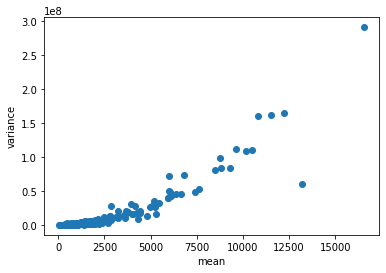

In [13]:
mean_variance_plot(table)

### Trying log-transformation

In [14]:
log_table = np.log2(table)

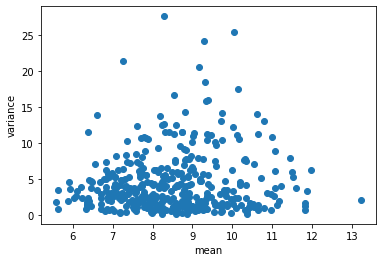

In [15]:
mean_variance_plot(log_table)

In [18]:
means1, variances1 = get_means_and_variances(table)
means2, variances2 = get_means_and_variances(log_table)
out1 = pd.DataFrame()
out1["means"], out1["variances"] = means1, variances1
out2 = pd.DataFrame()
out2["means"], out2["variances"] = means2, variances2
out1.to_csv("../Outdata/VarianceStabilizing/before.csv")
out2.to_csv("../Outdata/VarianceStabilizing/after.csv")


In [56]:
norm_log_table = log_table - np.mean(log_table)

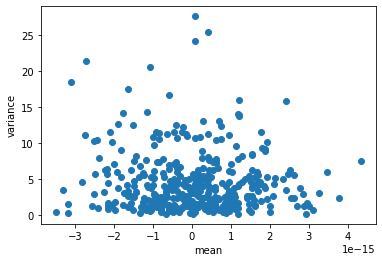

In [57]:
mean_variance_plot(norm_log_table)

In [58]:
pca = decomposition.PCA(n_components=2)

In [59]:
pca.fit(norm_log_table)

PCA(n_components=2)

In [60]:
components = pca.transform(norm_log_table)

In [61]:
components

array([[-38.43397162,  -2.36422252],
       [-34.72312269,   2.04894597],
       [-36.83381259,  -2.79388119],
       [-37.52737195,   4.18761525],
       [-35.37025517,  -1.81918596],
       [-37.35765394,   5.10784169],
       [-38.26358162,   1.8624453 ],
       [-37.0364968 ,   1.62826159],
       [-36.74172527,   4.71971381],
       [-33.62531445,  -4.09995968],
       [-34.19355983,  -2.27540866],
       [-35.70578388,  -4.4452455 ],
       [ 38.68280652,  15.78331704],
       [ 35.6144057 ,  -6.31825359],
       [ 37.86901133,  10.07568142],
       [ 35.13215619,  -7.30028331],
       [ 39.0963746 ,  21.53203005],
       [ 35.66084989,  -5.27294044],
       [ 35.24253487,   9.48909633],
       [ 39.11109964,  -5.11550207],
       [ 33.88628165,  -9.98583579],
       [ 35.26406825,  -9.03880147],
       [ 34.80929921,  -4.86931016],
       [ 35.44376195, -10.73611809]])

In [71]:
list(data.gsms.values())[-1].metadata["title"]

['adjacent normal tissue 6']

In [21]:
controls = np.array(["normal" in k.metadata["title"][0] for k in list(data.gsms.values())])

In [22]:
controls

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True])

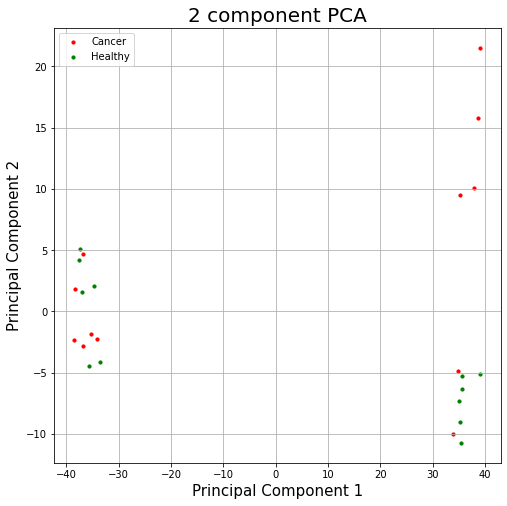

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy'][::-1]
colors = ['r', 'g']
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.legend(targets)
ax.grid()